# How to Use AI in Content Marketing

Welcome to this tutorial on leveraging AI for content marketing. In this video, we'll walk through a step-by-step process of using AI models to enhance your content creation, analysis, and distribution efforts.


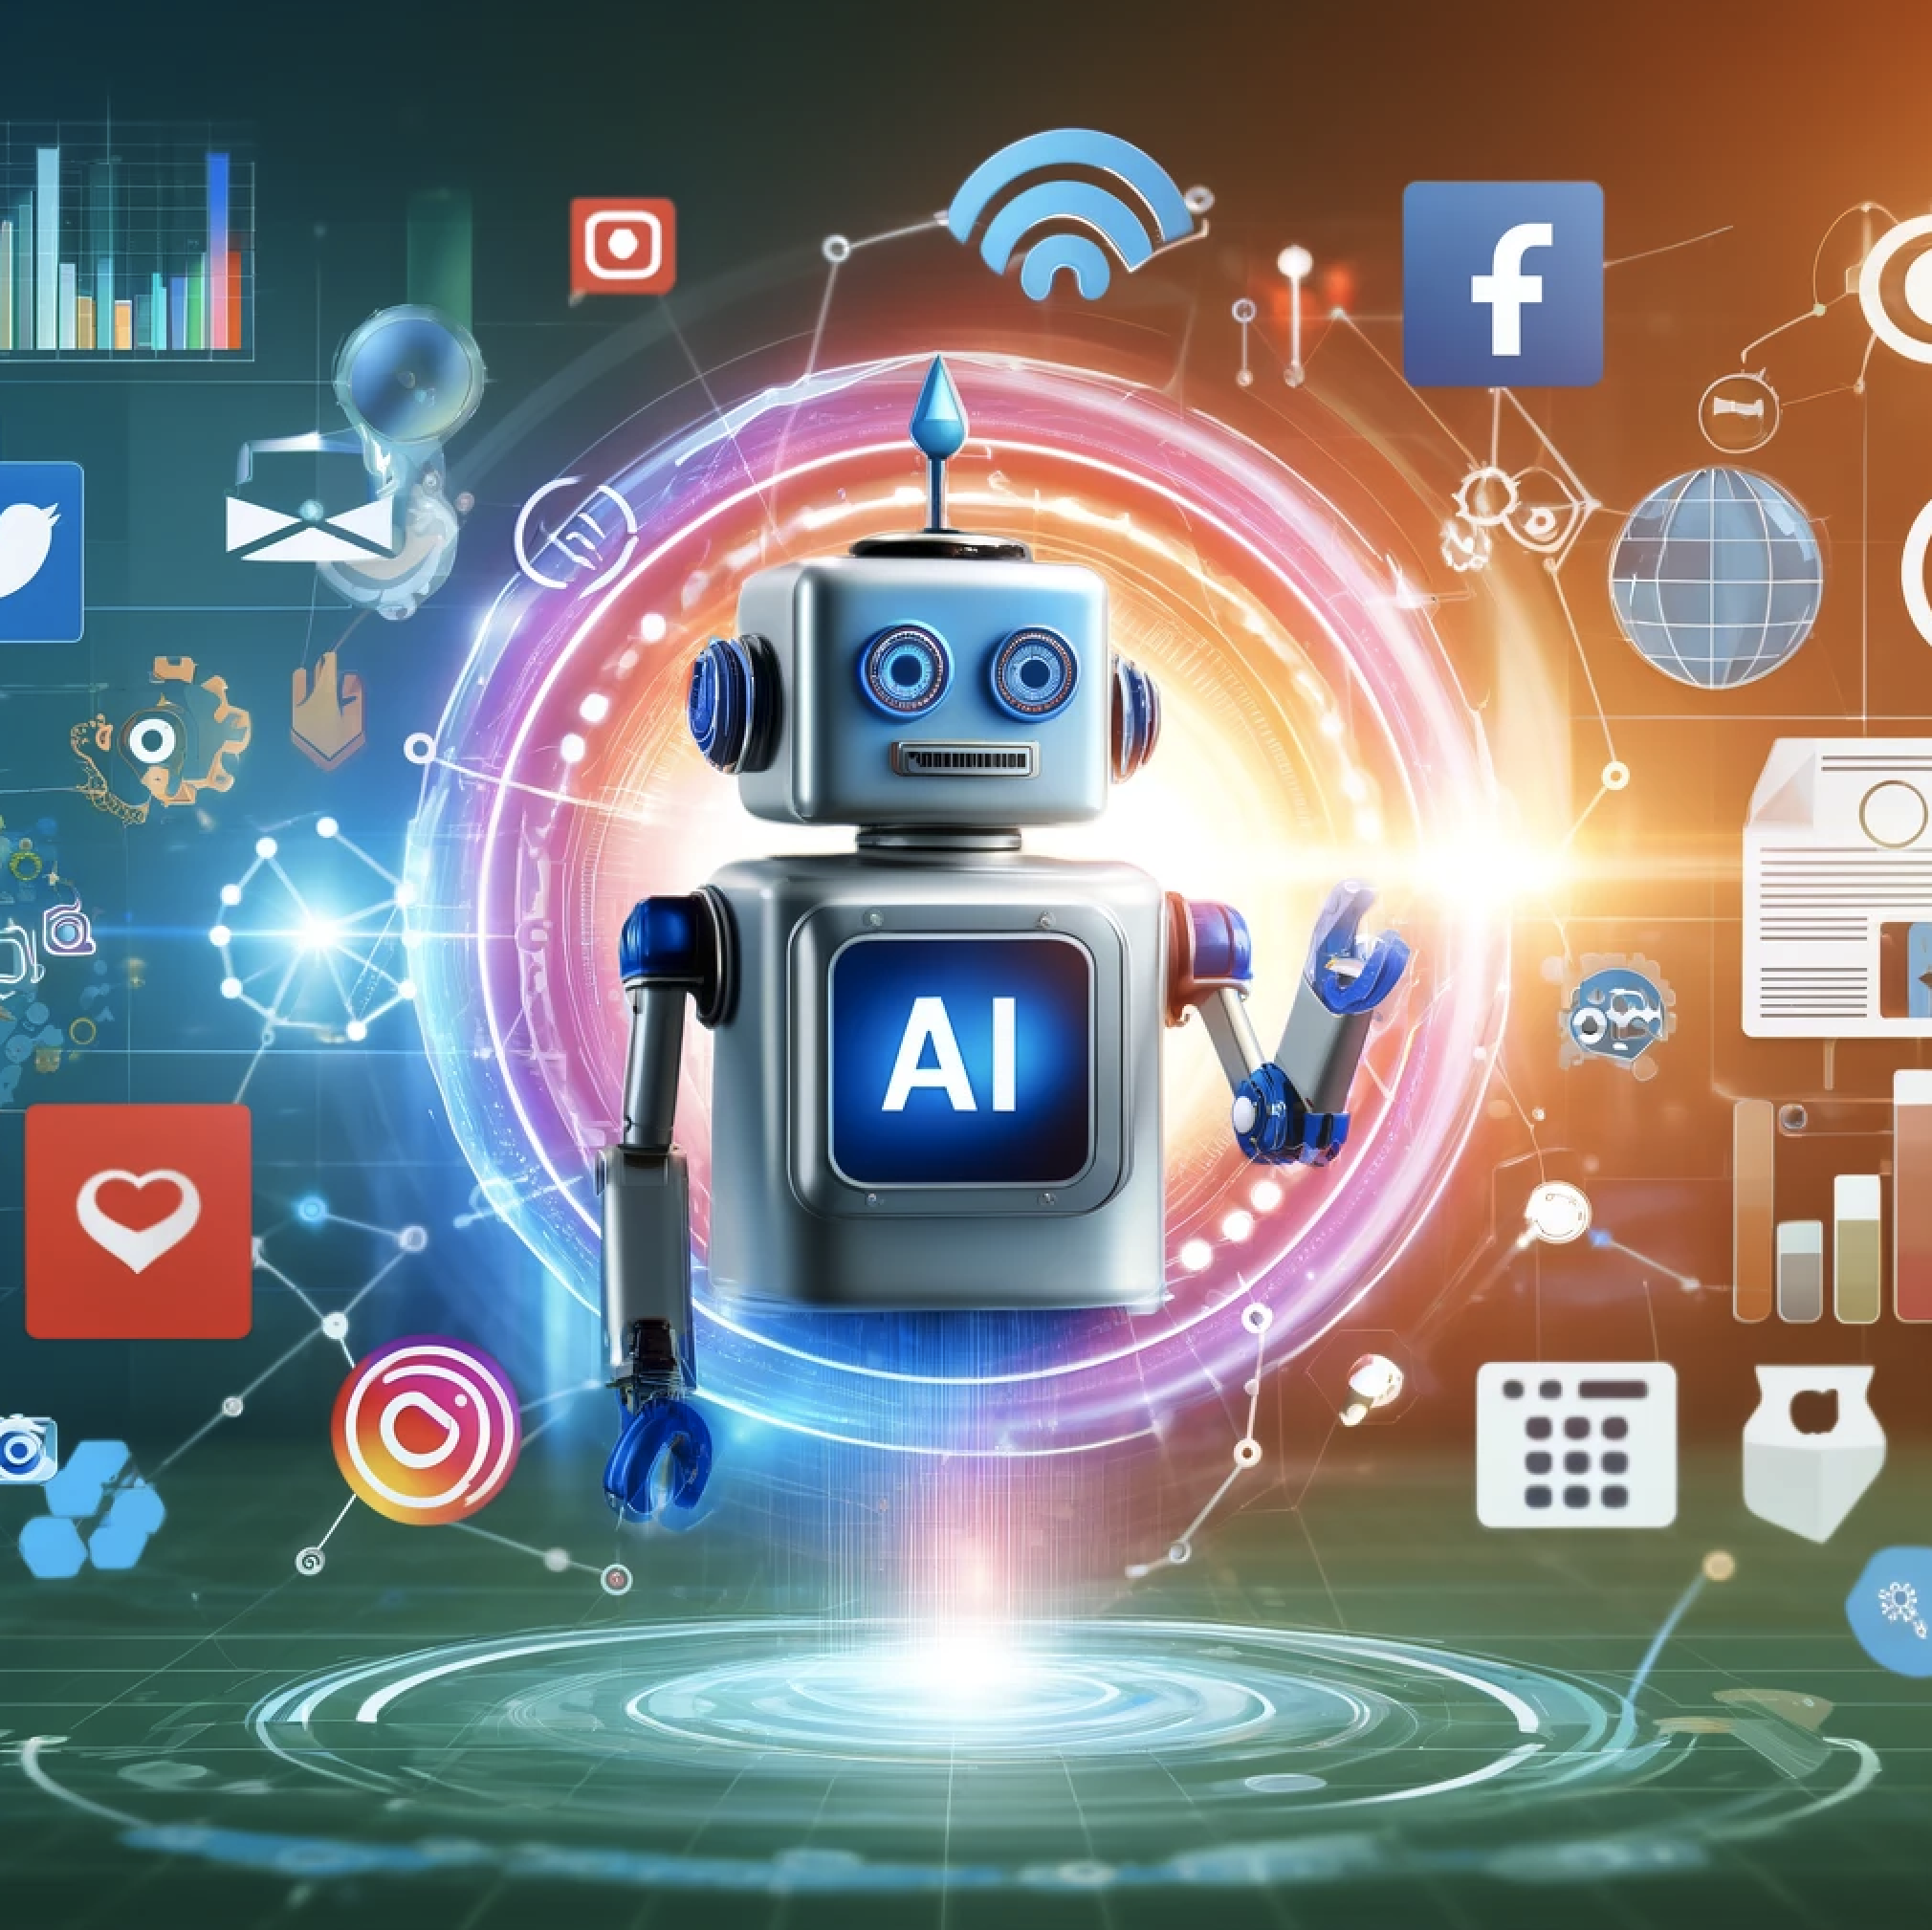

In [1]:
# Load the packages
import markdown2
import numpy as np
import openai
import os
import pandas as pd
import webbrowser

import src.helpers as helpers

from datetime import datetime

## Step 1: Load Your AI Models

First, we need to load the necessary packages and configure our AI models.

In [2]:
# Load Open AI API Key
OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")

# API configuration
OPENAI_ENDPOINT = os.environ.get("OPENAI_ENDPOINT")

client = openai.OpenAI(
        api_key=OPENAI_API_KEY
    )

### Helper Functions
Define helper functions to interact with the OpenAI API.

In [3]:
def get_completion(prompt, model="gpt-4o"):
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "system",
                "content": "You are a highly intelligent AI skilled in parsing and summarizing content, identifying main themes and stylistic approaches."
            },
            {
                "role": "user",
                "content": prompt
            }
        ],
        temperature=0.8
    )

    # Parsing the response to extract the theme and style
    response_text = response.choices[0].message.content

    return (response_text)

In [4]:
def get_completion_three(prompt, model="gpt-3.5-turbo"):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {
                "role": "system",
                "content": "You are a highly intelligent AI skilled in parsing and summarizing content, identifying main themes and stylistic approaches."
            },
            {
                "role": "user",
                "content": prompt
            }
        ],
        temperature=0.8
    )

    # Parsing the response to extract the theme and style
    response_text = response.choices[0].message.content

    return (response_text)

#### Example Prompt
Let's test the AI with a simple prompt to see how it responds.

In [5]:
test_prompt = """
List 5 ways that AI can help with content creation.
"""
test = get_completion(test_prompt)
print(test)

Certainly! Here are five ways AI can assist with content creation:

1. **Automated Writing and Editing**:
   - AI tools like GPT-3 can generate text based on prompts, helping to draft articles, blog posts, and social media updates. They can also assist in editing by suggesting improvements in grammar, style, and coherence.

2. **Content Personalization**:
   - AI can analyze user data to create personalized content that caters to individual preferences and behaviors. This can be applied in email marketing, recommendation systems, and personalized website experiences.

3. **SEO Optimization**:
   - AI can help identify relevant keywords, suggest meta tags, and optimize content structure to improve search engine rankings. Tools like Clearscope and MarketMuse analyze top-performing content and provide actionable SEO recommendations.

4. **Data Analysis and Insights**:
   - AI can process large datasets to uncover trends, insights, and patterns that can inform content strategy. This includ

## Step 2: Analyze Your Source Text

Next, we load and analyze the source text to extract valuable insights.

In [6]:
## Load source text

file_path = '../data/gemini-for-google-workspace-prompting-guide-101.pdf'  # Replace with your file path

### Read Text File
# content = read_text_file(file_path)

### Read PDF File
content = helpers.read_pdf(file_path)

print(content[:500])

1
Prompting
guide 101
April 2024 edition
A quick-start 
handbook for 
effective prompts
2
Writing effective prompts 
From the very beginning, Google Workspace was built to allow you to collaborate in real time with other people. 
Now, you can also collaborate with AI using Gemini for Google Workspace to help boost your productivity and 
creativity without sacrificing privacy or security. The embedded generative AI-powered features can help you 
write, organize, visualize, accelerate workflows, h


### Summarize Source Text
We use AI to summarize the content of the PDF file.

In [7]:
summary_prompt = f"""
You are a technology market analyst who is summarizing walkthroughs.

Read through the content below and summarize the concepts discussed.

Your objective is to delve into a specific tactic or strategy, providing readers with actionable insights and practical advice that they can implement in their own projects or businesses.

Offer a detailed exploration of the tactic or strategy. Use subheadings to organize the content into key components or steps.

```{content}```

"""

In [8]:
summary = get_completion(summary_prompt)
print(summary)

## Actionable Insights and Practical Advice for Writing Effective Prompts with Gemini for Google Workspace

### Introduction

Effective prompting is crucial for leveraging the full potential of Gemini for Google Workspace. This AI assistant can dramatically enhance productivity, creativity, and efficiency across various roles and tasks. This guide offers a detailed exploration of the tactics for writing effective prompts, focusing on the four core elements: Persona, Task, Context, and Format.

### Key Components of Effective Prompts

#### 1. Persona
Defining the persona sets the stage for the AI, helping it understand the perspective and role it should adopt while generating content.

**Example:**
"You are a Google Cloud program manager."

#### 2. Task
Clearly stating the task ensures that the AI knows exactly what it needs to accomplish.

**Example:**
"Draft an executive summary email."

#### 3. Context
Providing context helps the AI understand the background and specifics, ensuring m

## Step 3: Draft and Outline Blog Post

Using the summarized content, we draft an outline for a blog post.

In [9]:
### Set the theme of the blog post and SEO keywords

point_of_view = "Everyone should learn prompt engineering."

seo_keywords = [
    "how to write a good prompt for genai",
    "what are genai examples",
    "what is an example of bad ai prompt",
    "how do you write an effective writing prompt"
]

In [10]:
blog_outline_prompt = f"""
You are an experienced digital marketing consultant who specializes in newsletter content creation.

Your job is to write compelling content for a blog that covers innovation. Focus on:
1. Headline: Every great blog post starts with a headline that grabs the reader's attention, and compels them to click and keep reading to learn more.
2. Introduction: The introduction needs to quickly hook your reader and convince her to read the rest of your blog post.
3. Sub-Headers: Sub-headers are another on-page SEO element that helps your blog post to rank in Google Search. Sub-headers organize and break up your blog post into different sections to signal to Google (and your reader) what the post will cover.
4. Body: The meat of your blog post -- separated by various sub-headers, of course -- is where your readers will undoubtedly derive the most value. You have the freedom to draft compelling content for the body of your blog post using your own creativity and the summarized content below.
5. Data: Whenever it's possible to use data and numbers, do so. Numbers written as numerals (23) instead of words (twenty-three) have been shown to attract reader attention when they quickly scan what they're reading online. Additionally, numbers represent facts -- which are unimpeachable and most trusted by your readers.
6. Multimedia Elements: Wherever it's possible to use multimedia content to break up the blog post and re-engage your reader, recommend images, videos, audio recordings, and social media posts.
7. Conclusion: When you're ready to wrap up and sign off, make sure to let your reader know the article is closing. Your conclusion doesn't need to be lengthy, but it should serve to recap the blog post the reader just finished and provide more resources and guidance, if wanted.
8. CTA: Finish your conclusion with a meaningful call to action (CTA) for your reader -- whether it's advice, a content offer, or a link to another related blog post. Use the last lines of your post to leave the reader feeling like he or she learned something from you -- and like there's, even more, to learn from you, creating the desire to click a link or CTA image and read more.

You are tasked with writing a new blog post to convey the following point of view: 
```{point_of_view}```

Your blog post should rank highly for the following keywords: 
```{seo_keywords}```

Write a blog post using the following summary notes:
```{summary}```
"""

In [11]:
outline = get_completion(blog_outline_prompt)
print(outline)

# Why Everyone Should Learn Prompt Engineering

## Introduction

In a world increasingly driven by artificial intelligence, mastering the skill of prompt engineering is becoming essential for professionals across all fields. Whether you are a marketer looking to craft the perfect campaign or an executive drafting a crucial email, effective prompting can significantly enhance productivity, creativity, and efficiency. Today, we will delve into the fundamentals of crafting effective prompts for AI, with a special focus on Gemini for Google Workspace.

## Key Components of Effective Prompts

### 1. Persona

Defining the persona helps the AI understand the perspective and role it should adopt while generating content.

**Example:**  
"You are a Google Cloud program manager."

### 2. Task

Clearly stating the task ensures that the AI knows exactly what it needs to accomplish.

**Example:**  
"Draft an executive summary email."

### 3. Context

Providing context helps the AI understand the ba

## Step 4: Create Content Ideas for LinkedIn Content

We will create a structured content plan for LinkedIn based on the blog outline.

In [12]:
li_outline = f"""
You are an experienced social media content creator who has extensive knowledge of the HR Technology space.

You are writing content to be shared on LinkedIn. The goal of this content is to create awareness and engagement.

Ultimately, we aim to learn what challenges potential customers are facing so we can build services and solutions to solve them.

Each week, we write 7 different content pieces on a topic, then schedule the content to be posted online. Here are the 7 themes with examples:

Step-by-Step Guide
How can people accomplish something with a clear, actionable process?

Inspirational Story
Share a story or anecdote that motivates people to take action.

Deep Dive Analysis
Provide an in-depth examination of a company, person, or trend.

Insightful Observation
Discuss an interesting observation or trend you've noticed.

Challenging the Norm
Present a viewpoint that goes against the common beliefs or practices.

Comparative Analysis
Contrast two situations to highlight key differences and insights.

Current vs. Future State
Discuss how things operate today and your vision for the future.

Your task is to use the draft newsletter article to map a topic to each of these 7 themes, then describe the key message in 1 sentence.

Here is the draft newsletter:
```{outline}```
"""

In [13]:
li_content_outline = get_completion(li_outline)
print(li_content_outline)

Certainly! Here are the seven content pieces mapped to each theme along with the key message for each:

1. **Step-by-Step Guide**
   - **Topic:** Steps for Writing Effective Prompts
   - **Key Message:** "Learn how to write effective AI prompts in four actionable steps: define the persona, specify the task, provide context, and outline the format."

2. **Inspirational Story**
   - **Topic:** Application Across Roles
   - **Key Message:** "Discover how a customer service agent transformed their response strategy using AI prompt engineering to resolve customer complaints more empathetically and efficiently."

3. **Deep Dive Analysis**
   - **Topic:** Key Components of Effective Prompts
   - **Key Message:** "Explore an in-depth examination of the four key components that make an AI prompt effective: persona, task, context, and format."

4. **Insightful Observation**
   - **Topic:** Practical Tips for Crafting Prompts
   - **Key Message:** "Observing how the use of natural language, speci

## Step 5: Draft Content for the 7 Areas

Using the LinkedIn content outline, we draft content for each of the seven areas.

In [14]:
### Setup parameters for creating LinkedIn content

content_list = [
    "Step-by-Step Guide",
    "Inspirational Story",
    "Deep Dive Analysis",
    "Insightful Observation",
    "Challenging the Norm",
    "Comparative Analysis",
    "Current vs. Future State"
]

li_writing_prompt_template = f"""
You are an experienced social media content creator who has extensive knowledge of the AI space.

I will provide you with an outline post and you will write an original content piece suitable for LinkedIn.

Keep the post on topic and conveying the key message while keeping it succinct, no more than 4-5 paragraphs, and at a 5th grade reading level.

Here's the content outline for all of our posts:
```{li_content_outline}```

Now write a {content} post.

Make sure to return plain text only without markup formatting. 
"""

In [15]:
### Create content for each of the content areas defined

content_dict = {}

for content in content_list:
    li_writing_prompt = li_writing_prompt_template.format(outline=li_content_outline, content=content)
    content_dict[content] = get_completion(li_writing_prompt)

In [16]:
### Create a table to allow exporting of content
df = pd.DataFrame.from_dict(content_dict, orient='index', columns=['Content'])

# Transpose the DataFrame to have content types as column headings
df = df.transpose()

df.head()

,Step-by-Step Guide,Inspirational Story,Deep Dive Analysis,Insightful Observation,Challenging the Norm,Comparative Analysis,Current vs. Future State
Content,### Step-by-Step Guide to Writing Effective AI...,# How to Write Effective AI Prompts\n\nAre you...,## Step-by-Step Guide: Writing Effective AI Pr...,**LinkedIn Post: Steps for Writing Effective A...,---\n**Unlock the Power of Effective AI Prompt...,**Steps for Writing Effective AI Prompts**\n\n...,# Prompting Guide 101: April 2024 Edition\n\nA...


## Step 6: Export the Content

Finally, we save the generated content for future use.

In [17]:
### Save the blog post as a html file

html_content = markdown2.markdown(outline)

### Generate filename with today's date

today_date = datetime.now().strftime('%Y-%m-%d')
blog_filename = f'../results/{today_date}_blog_post.html'

### Save newsletter as HTML file

with open(blog_filename, 'w') as file:
    file.write(html_content)

In [18]:
### Save the LinkedIn content as a csv file

# Define file n
linkedin_filename = f"../results/{today_date}_linkedin_posts.csv"

# Save filtered_df
df.to_csv(linkedin_filename, index=False)

### Conclusion
By following these steps, you can effectively use AI to streamline and enhance your content marketing strategy. Don't forget to like, subscribe, and leave a comment if you found this tutorial helpful!